## Imports das bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
from pathlib import Path
import re
warnings.filterwarnings('ignore')


# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

## Leitura e Consolidação dos Dados Brutos (2024-2025)

In [23]:
RAW_PATH = Path('.') 
RAW_FILES = sorted([p for p in RAW_PATH.iterdir() if p.suffix.lower() == ".csv"])

dataframes = []
for file in RAW_FILES:
    year = re.search(r'acidentes(\d{4})', file.name)
    df_year = pd.read_csv(file, dtype='string', low_memory=False, encoding='latin1', sep=';')
    df_year['ano_acidente'] = year
    dataframes.append(df_year)

df = pd.concat(dataframes, ignore_index=True)
print(f'Dataset consolidado: {len(df):,} registros | {len(df.columns)} colunas')

Dataset consolidado: 1,131,595 registros | 38 colunas


In [24]:
df['mortos'] = pd.to_numeric(df['mortos'], errors='coerce').fillna(0).astype(int)
df['feridos_graves'] = pd.to_numeric(df['feridos_graves'], errors='coerce').fillna(0).astype(int)
df['feridos_leves'] = pd.to_numeric(df['feridos_leves'], errors='coerce').fillna(0).astype(int)
df['ilesos'] = pd.to_numeric(df['ilesos'], errors='coerce').fillna(0).astype(int)

## Visão Geral do Dataset Consolidado

In [25]:
df.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,ano_acidente
0,571772,1268971,2024-01-01,segunda-feira,00:05:00,RJ,101,"272,5",TANGUA,Sim,...,0,0,0,1,-22.72935968,-42.70112512,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ,"<re.Match object; span=(0, 13), match='acident..."
1,571774,1268985,2024-01-01,segunda-feira,00:05:00,GO,153,"424,6",ANAPOLIS,Não,...,1,0,0,0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO,"<re.Match object; span=(0, 13), match='acident..."
2,571774,1268985,2024-01-01,segunda-feira,00:05:00,GO,153,"424,6",ANAPOLIS,Sim,...,1,0,0,0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO,"<re.Match object; span=(0, 13), match='acident..."
3,571777,1269020,2024-01-01,segunda-feira,01:45:00,ES,101,"264,1",SERRA,Sim,...,1,0,0,0,-20.17292791,-40.26736384,SPRF-ES,DEL02-ES,UOP01-DEL02-ES,"<re.Match object; span=(0, 13), match='acident..."
4,571778,1269028,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Não,...,1,0,0,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,"<re.Match object; span=(0, 13), match='acident..."
5,571778,1269045,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Não,...,0,1,0,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,"<re.Match object; span=(0, 13), match='acident..."
6,571778,1269028,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Sim,...,1,0,0,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,"<re.Match object; span=(0, 13), match='acident..."
7,571778,1269045,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Sim,...,0,1,0,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,"<re.Match object; span=(0, 13), match='acident..."
8,571779,1268998,2024-01-01,segunda-feira,01:45:00,RS,116,236,NOVO HAMBURGO,Sim,...,1,0,0,0,-29.66938502,-51.14304731,SPRF-RS,DEL01-RS,UOP02-DEL01-RS,"<re.Match object; span=(0, 13), match='acident..."
9,571779,1268999,2024-01-01,segunda-feira,01:45:00,RS,116,236,NOVO HAMBURGO,Sim,...,1,0,0,0,-29.66938502,-51.14304731,SPRF-RS,DEL01-RS,UOP02-DEL01-RS,"<re.Match object; span=(0, 13), match='acident..."


## Informações do Dataset

In [26]:
print(f"Registros: {len(df):,} | Colunas: {len(df.columns)} | Período: 2024-2025 | Memória: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
df.info()

Registros: 1,131,595 | Colunas: 38 | Período: 2024-2025 | Memória: 2693.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131595 entries, 0 to 1131594
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   id                      1131595 non-null  string
 1   pesid                   1021489 non-null  string
 2   data_inversa            1131595 non-null  string
 3   dia_semana              1131595 non-null  string
 4   horario                 1131595 non-null  string
 5   uf                      1131595 non-null  string
 6   br                      1128984 non-null  string
 7   km                      1128984 non-null  string
 8   municipio               1131595 non-null  string
 9   causa_principal         1131595 non-null  string
 10  causa_acidente          1131595 non-null  string
 11  ordem_tipo_acidente     1131595 non-null  string
 12  tipo_acidente           1131595 non-null  string


## Estatísticas Descritivas

In [27]:
df.describe()

,ilesos,feridos_leves,feridos_graves,mortos
count,1.131595e+06,1.131595e+06,1.131595e+06,1.131595e+06
mean,3.706388e-01,3.084399e-01,1.153531e-01,4.865345e-02
std,4.829761e-01,4.618494e-01,3.194477e-01,2.151426e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## ANÁLISE 1: Evolução Temporal (2024-2025)
### Comparativo entre os dois anos

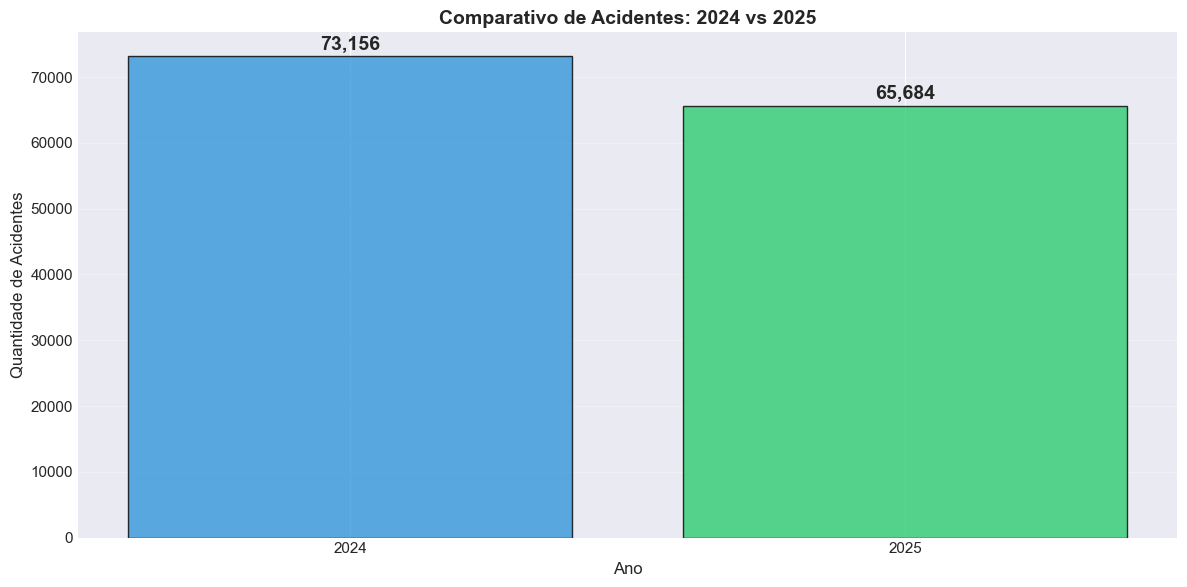

2024: 73,156 | 2025: 65,684 | Variação: -10.2%


In [28]:
df['data_dt'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')
df['ano'] = df['data_dt'].dt.year
df['mes'] = df['data_dt'].dt.month
df['ano_mes'] = df['data_dt'].dt.to_period('M')

acidentes_ano = df.groupby('ano')['id'].nunique().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
cores = ['#3498db', '#2ecc71']
bars = ax.bar(acidentes_ano.index.astype(str), acidentes_ano.values, 
              color=cores, alpha=0.8, edgecolor='black')

for i, (ano, valor) in enumerate(acidentes_ano.items()):
    ax.text(i, valor + 1000, f'{valor:,}', ha='center', fontweight='bold', fontsize=14)

ax.set_title('Comparativo de Acidentes: 2024 vs 2025', fontsize=14, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

if 2024 in acidentes_ano.index and 2025 in acidentes_ano.index:
    acidentes_2024 = acidentes_ano[2024]
    acidentes_2025 = acidentes_ano[2025]
    variacao = ((acidentes_2025 - acidentes_2024) / acidentes_2024) * 100
    print(f"2024: {acidentes_2024:,} | 2025: {acidentes_2025:,} | Variação: {variacao:+.1f}%")

## ANÁLISE 1.1: Evolução Mensal

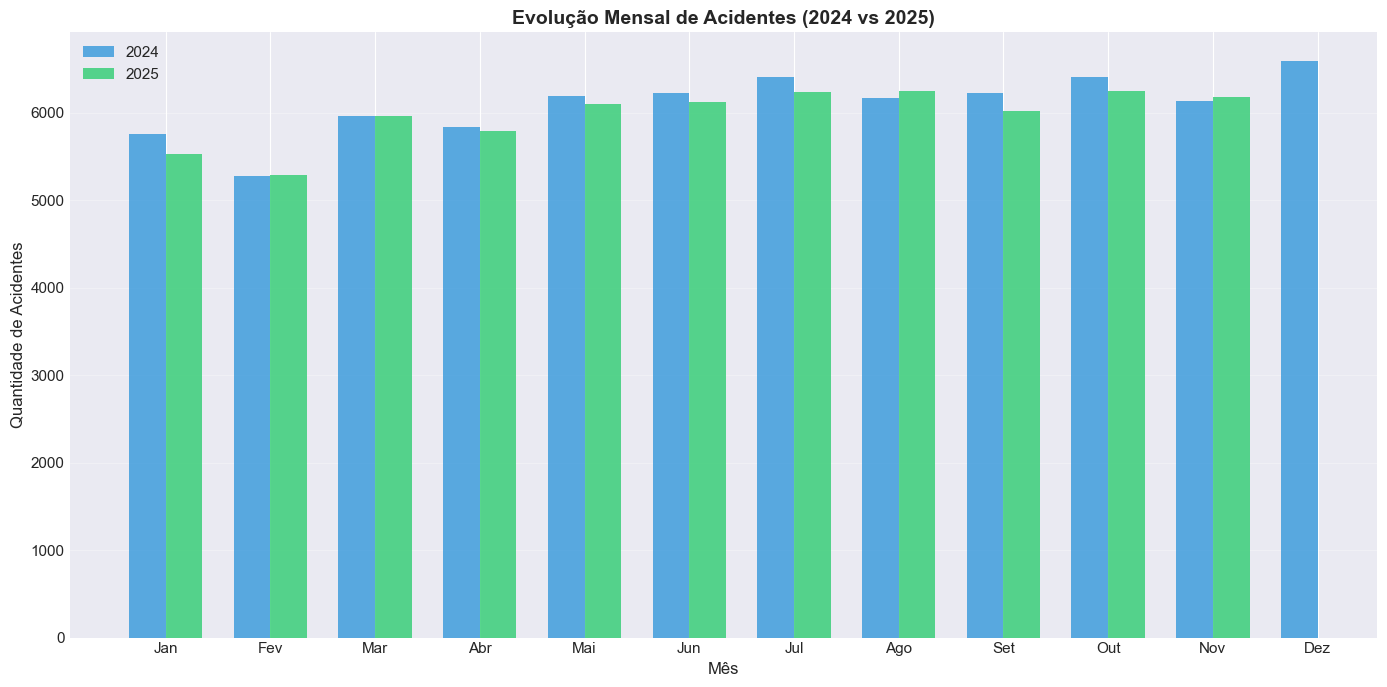

In [29]:
acidentes_mes = df.groupby(['ano', 'mes'])['id'].nunique().unstack(level=0)

fig, ax = plt.subplots(figsize=(14, 7))
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
x = np.arange(len(meses))
width = 0.35

if 2024 in acidentes_mes.columns:
    valores_2024 = [acidentes_mes[2024].get(i, 0) for i in range(1, 13)]
    ax.bar(x - width/2, valores_2024, width, label='2024', color='#3498db', alpha=0.8)

if 2025 in acidentes_mes.columns:
    valores_2025 = [acidentes_mes[2025].get(i, 0) for i in range(1, 13)]
    ax.bar(x + width/2, valores_2025, width, label='2025', color='#2ecc71', alpha=0.8)

ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
ax.set_title('Evolução Mensal de Acidentes (2024 vs 2025)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(meses)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## ANÁLISE 2: Distribuição Geográfica (por UF)

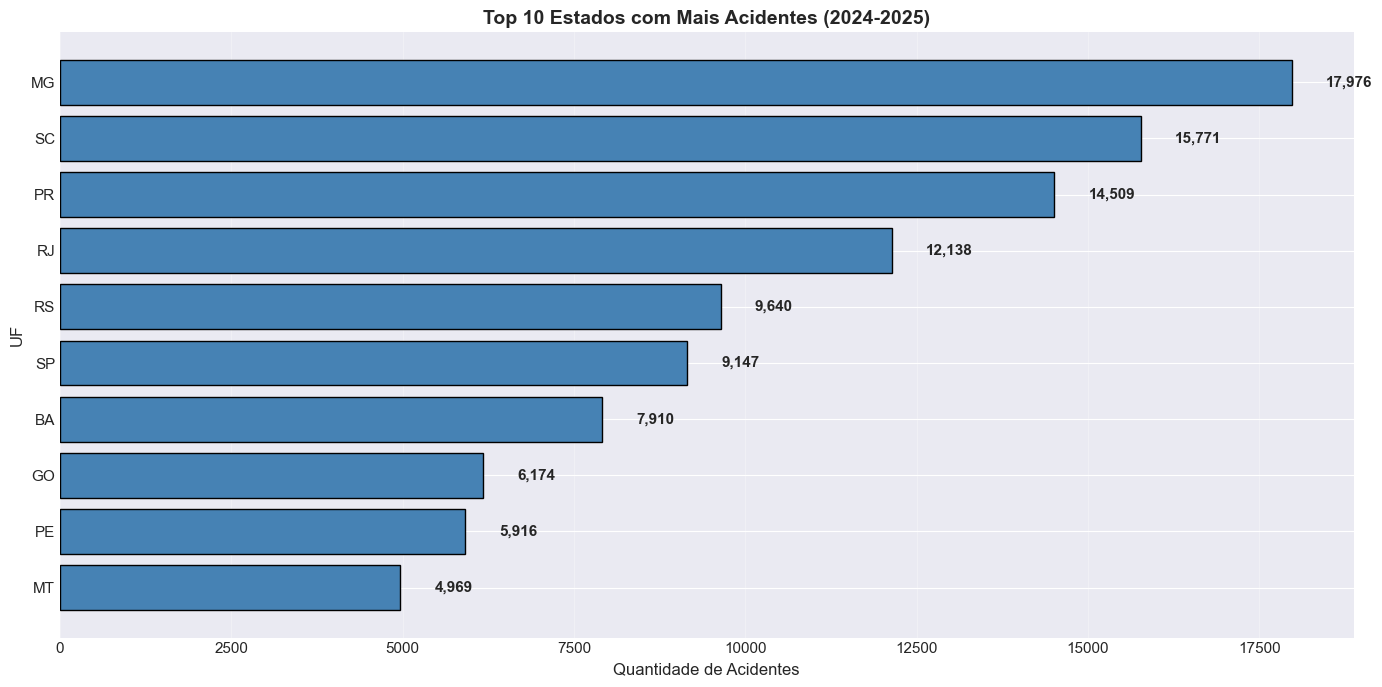

In [30]:
acidentes_uf = df.groupby('uf')['id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
bars = plt.barh(acidentes_uf.index, acidentes_uf.values, color='steelblue', edgecolor='black')

for i, (uf, valor) in enumerate(acidentes_uf.items()):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title('Top 10 Estados com Mais Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Acidentes', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 3: Causas de Acidentes (Top 10)

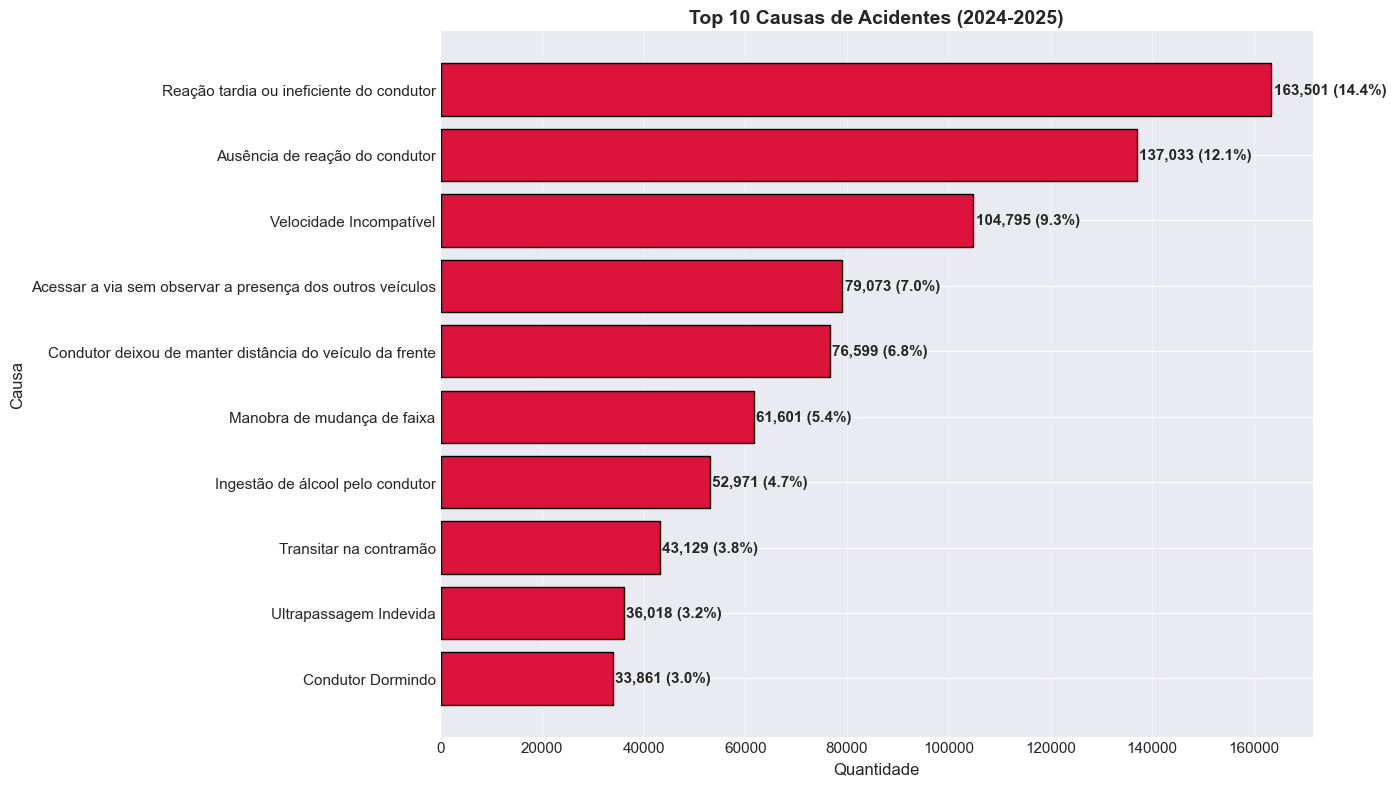

In [31]:
causas = df['causa_acidente'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(causas)), causas.values, color='crimson', edgecolor='black')
plt.yticks(range(len(causas)), causas.index)

for i, valor in enumerate(causas.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', 
             va='center', fontweight='bold')

plt.title('Top 10 Causas de Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Causa', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 4: Tipos de Acidentes (Top 10)

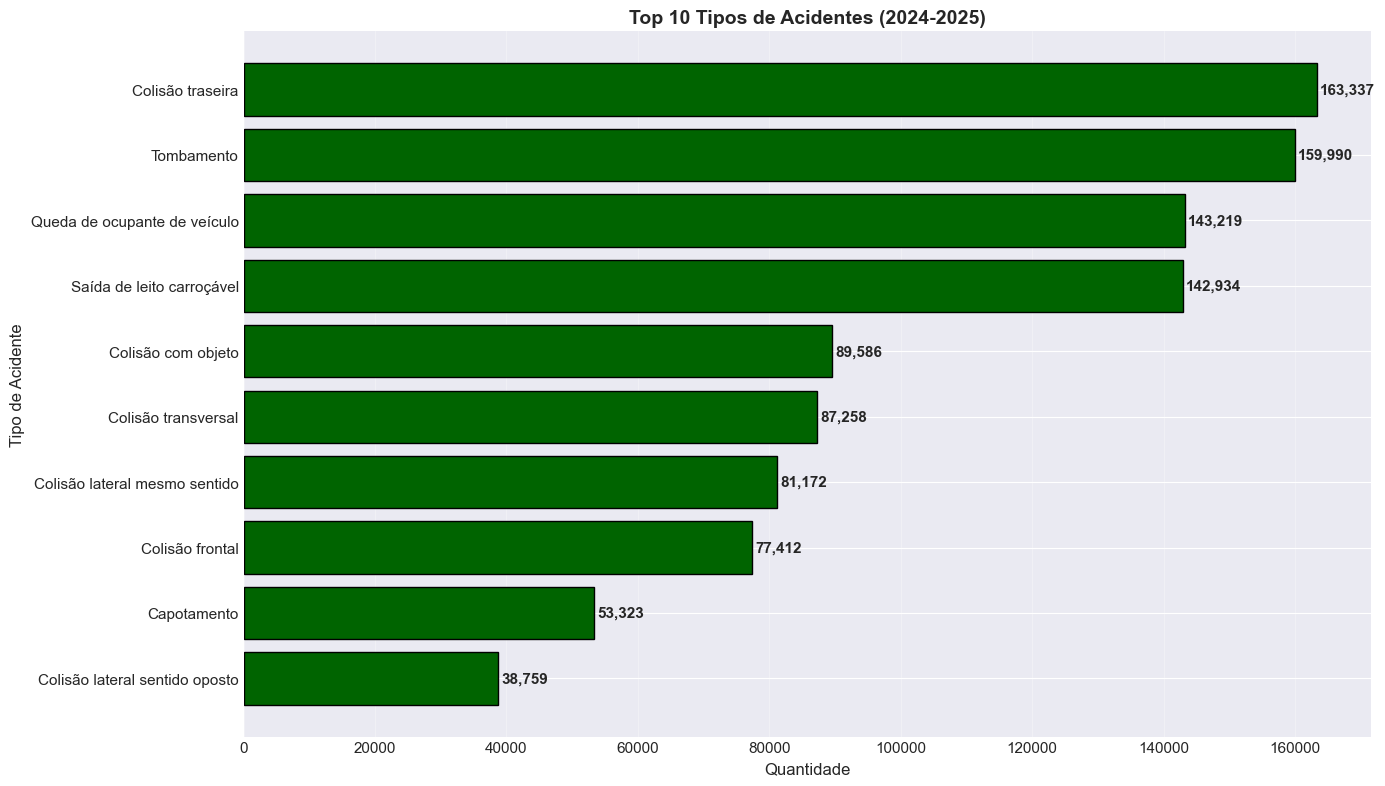

In [32]:
tipos = df['tipo_acidente'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(tipos)), tipos.values, color='darkgreen', edgecolor='black')
plt.yticks(range(len(tipos)), tipos.index)

for i, valor in enumerate(tipos.values):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title('Top 10 Tipos de Acidentes (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 5: Gravidade - Análise de Vítimas

Mortos: 55,056 | Feridos Graves: 130,533 | Feridos Leves: 349,029 | Ilesos: 419,413
Total de pessoas envolvidas: 954,031


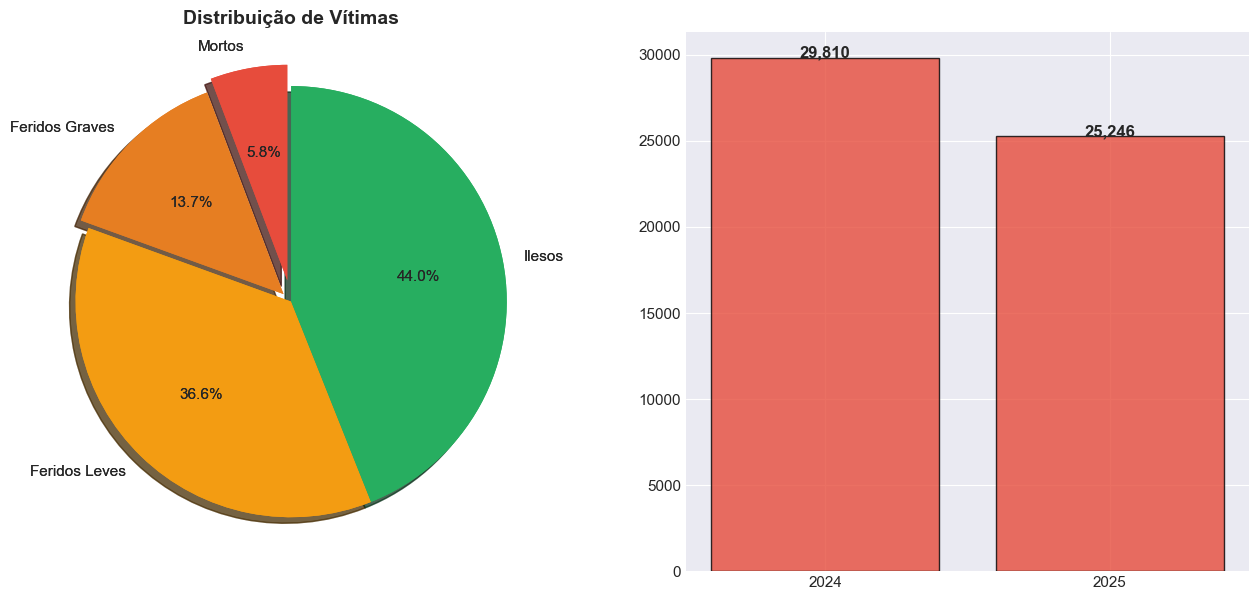

In [33]:
total_mortos = df['mortos'].sum()
total_feridos_graves = df['feridos_graves'].sum()
total_feridos_leves = df['feridos_leves'].sum()
total_ilesos = df['ilesos'].sum()

print(f"Mortos: {total_mortos:,} | Feridos Graves: {total_feridos_graves:,} | Feridos Leves: {total_feridos_leves:,} | Ilesos: {total_ilesos:,}")
print(f"Total de pessoas envolvidas: {total_mortos + total_feridos_graves + total_feridos_leves + total_ilesos:,}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de pizza
vitimas_data = [total_mortos, total_feridos_graves, total_feridos_leves, total_ilesos]
vitimas_labels = ['Mortos', 'Feridos Graves', 'Feridos Leves', 'Ilesos']
colors = ['#e74c3c', '#e67e22', '#f39c12', '#27ae60']
explode = (0.1, 0.05, 0, 0)

ax1.pie(vitimas_data, labels=vitimas_labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
vitimas_data = [total_mortos, total_feridos_graves, total_feridos_leves, total_ilesos]
vitimas_labels = ['Mortos', 'Feridos Graves', 'Feridos Leves', 'Ilesos']
colors = ['#e74c3c', '#e67e22', '#f39c12', '#27ae60']
explode = (0.1, 0.05, 0, 0)

ax1.pie(vitimas_data, labels=vitimas_labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
ax1.set_title('Distribuição de Vítimas', fontsize=14, fontweight='bold')

mortos_ano = df.groupby('ano')['mortos'].sum()
ax2.bar(mortos_ano.index.astype(str), mortos_ano.values, 
        color='#e74c3c', edgecolor='black', alpha=0.8)
for i, (ano, valor) in enumerate(mortos_ano.items()):
    ax2.text(i, valor + 20, f'{valor:,}', ha='center', fontweight='bold', fontsize=12)

## ANÁLISE 6: Tipos de Veículos Envolvidos

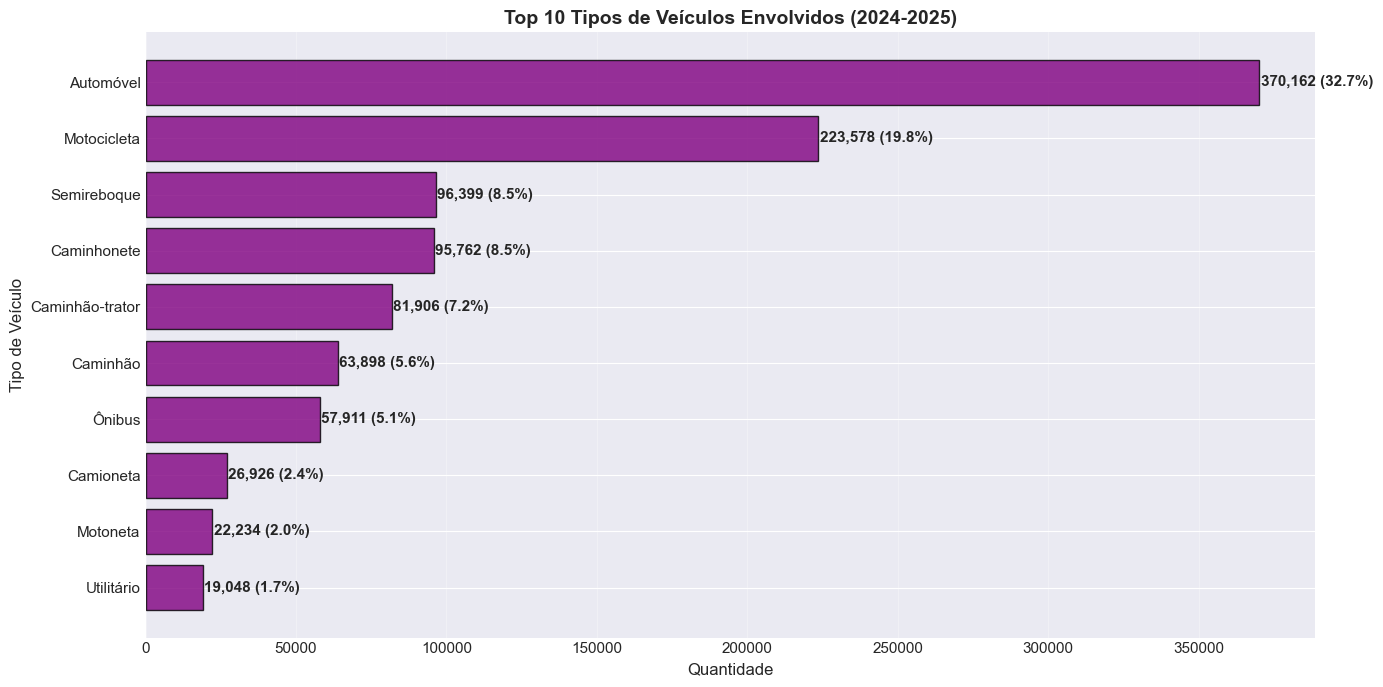

In [34]:
veiculos = df['tipo_veiculo'].value_counts().head(10)

plt.figure(figsize=(14, 7))
bars = plt.barh(range(len(veiculos)), veiculos.values, 
                color='purple', edgecolor='black', alpha=0.8)
plt.yticks(range(len(veiculos)), veiculos.index)

for i, valor in enumerate(veiculos.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', 
             va='center', fontweight='bold')

plt.title('Top 10 Tipos de Veículos Envolvidos (2024-2025)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Veículo', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## ANÁLISE 7: Condições Meteorológicas

,Condição Meteorológica,Quantidade,Percentual (%)
0,CÉU CLARO,706329,62.42
1,NUBLADO,170115,15.03
2,CHUVA,120458,10.64
3,SOL,63014,5.57
4,GAROA/CHUVISCO,45492,4.02
5,IGNORADO,12456,1.1
6,NEVOEIRO/NEBLINA,11949,1.06
7,VENTO,1757,0.16
8,GRANIZO,21,0.0
9,NEVE,4,0.0


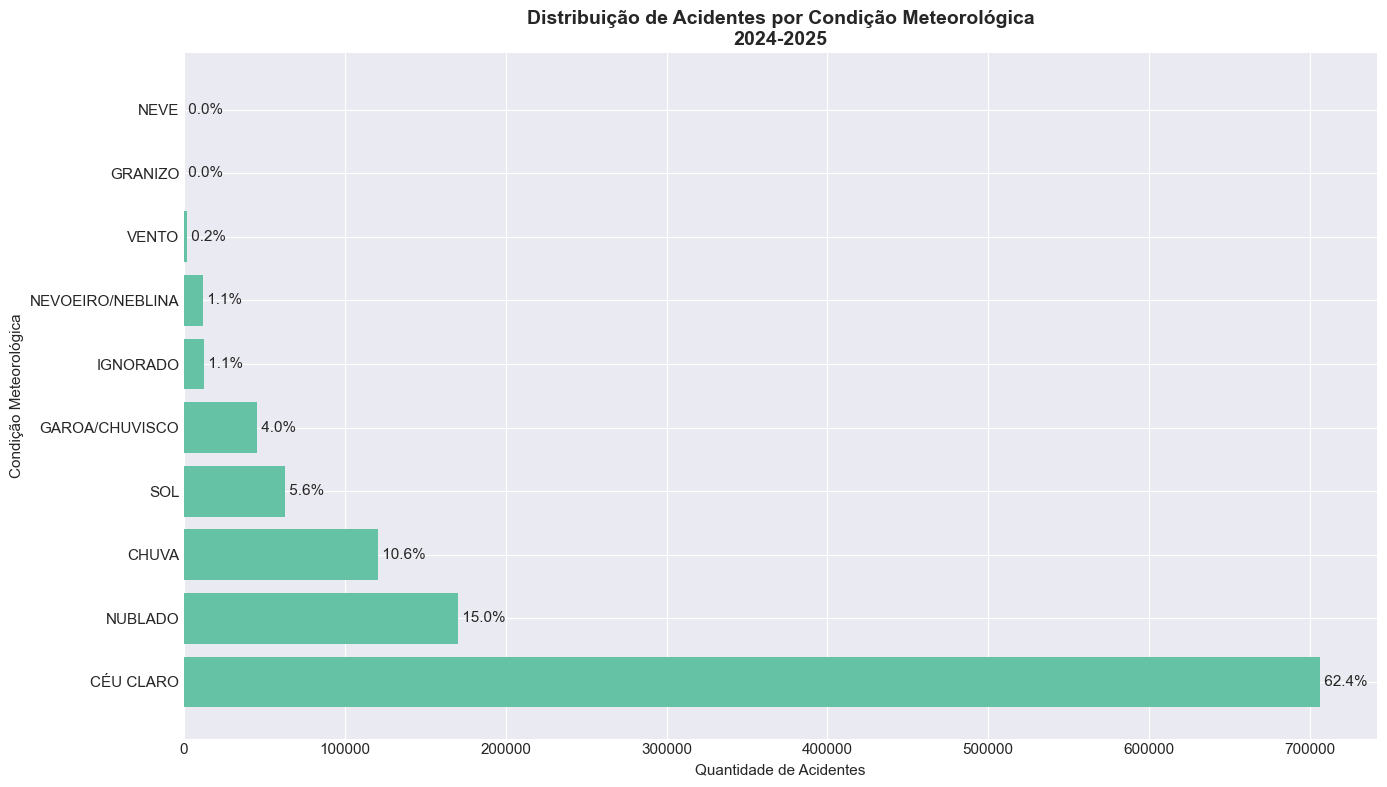

In [35]:
condicoes = df['condicao_metereologica'].fillna('NÃO INFORMADO').str.upper().value_counts()

condicoes_df = pd.DataFrame({
    'Condição Meteorológica': condicoes.index,
    'Quantidade': condicoes.values,
    'Percentual (%)': (condicoes.values / len(df) * 100).round(2)
})

display(condicoes_df)

plt.figure(figsize=(14, 8))
bars = plt.barh(condicoes_df['Condição Meteorológica'], condicoes_df['Quantidade'])

plt.title('Distribuição de Acidentes por Condição Meteorológica\n2024-2025',
          fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Condição Meteorológica')

for bar, pct in zip(bars, condicoes_df['Percentual (%)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {pct:.1f}%', va='center')

plt.tight_layout()
plt.show()


## RESUMO EXECUTIVO

## ANÁLISE 8: Matriz de Correlação - Tipo de Acidente vs Gravidade

gravidade,Com Mortos,Com Feridos Graves,Com Feridos Leves,Apenas Ilesos,TOTAL
tipo_acidente,,,,,
Capotamento,2947,7027,23362,19987,53323
Colisão com objeto,4650,9664,31555,43717,89586
Colisão frontal,8681,13136,18235,37360,77412
Colisão lateral mesmo sentido,1250,5467,22885,51570,81172
Colisão lateral sentido oposto,1419,3409,7923,26008,38759
Colisão transversal,2192,10596,26434,48036,87258
Colisão traseira,3321,12679,43529,103808,163337
Queda de ocupante de veículo,7406,21539,51687,62587,143219
Saída de leito carroçável,8493,16768,49350,68323,142934


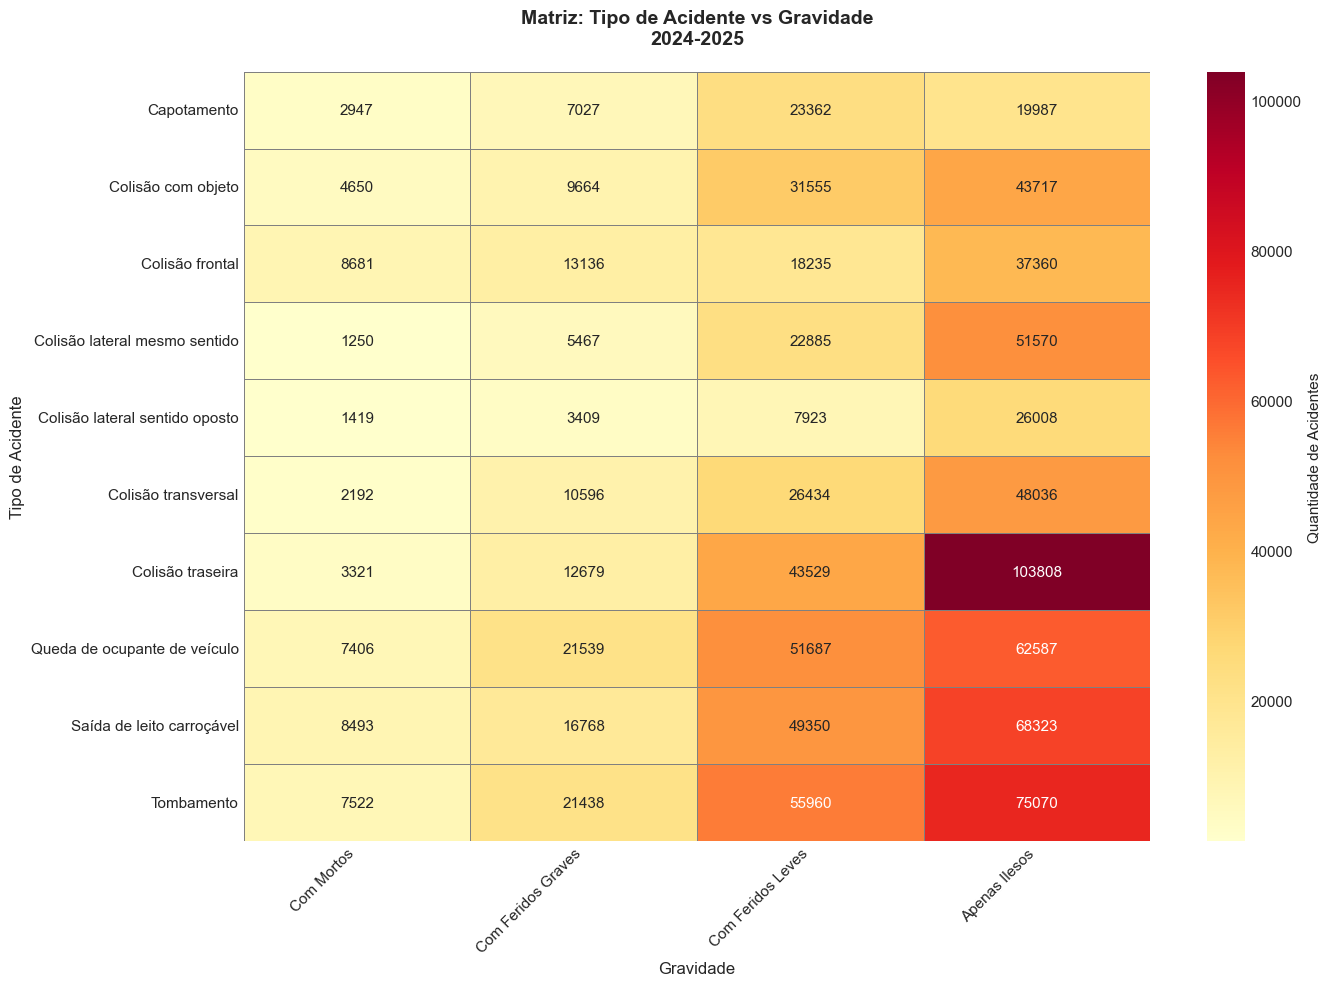

Text(0.5, 1.0, 'Distribuição de Gravidade por Tipo de Acidente (2024-2025)')

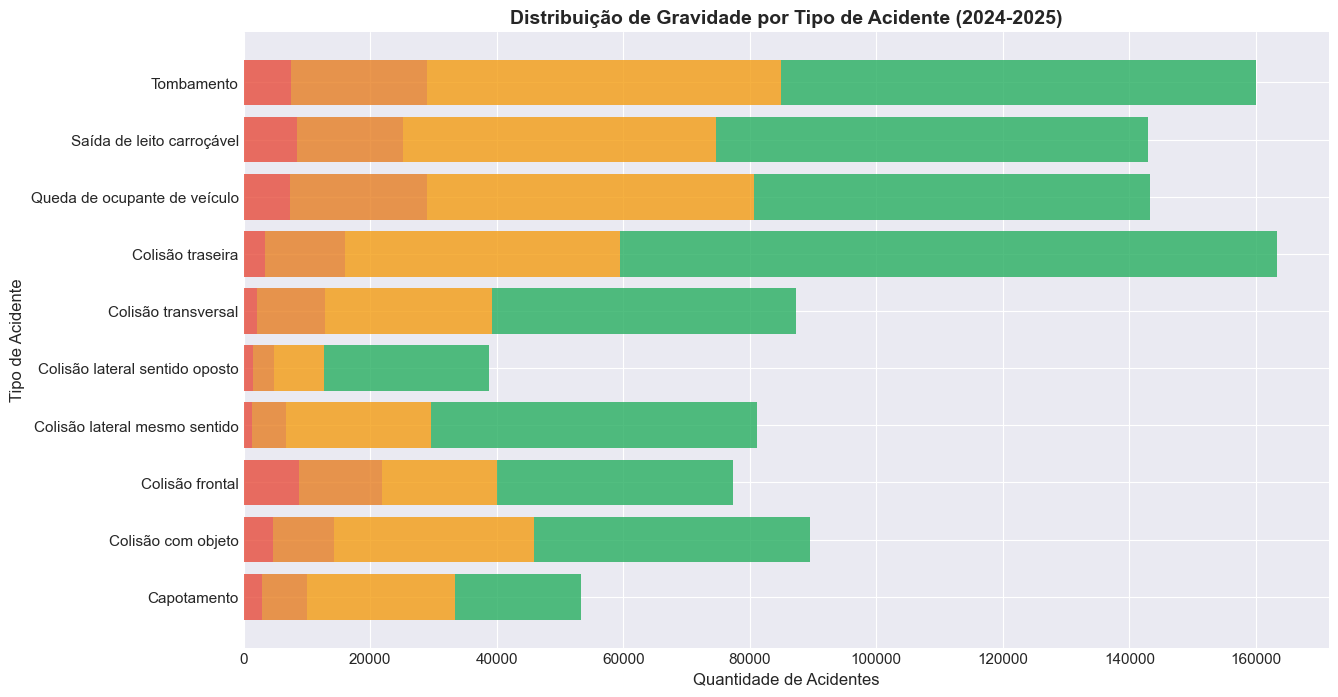

In [36]:
def classificar_gravidade(row):
    if row['mortos'] > 0:
        return 'Com Mortos'
    elif row['feridos_graves'] > 0:
        return 'Com Feridos Graves'
    elif row['feridos_leves'] > 0:
        return 'Com Feridos Leves'
    else:
        return 'Apenas Ilesos'

df['gravidade'] = df.apply(classificar_gravidade, axis=1)
top_tipos = df['tipo_acidente'].value_counts().head(10).index
df_matriz = df[df['tipo_acidente'].isin(top_tipos)]

matriz_tipo_gravidade = pd.crosstab(
    df_matriz['tipo_acidente'], 
    df_matriz['gravidade'],
    margins=True,
    margins_name='TOTAL'
)

ordem_colunas = ['Com Mortos', 'Com Feridos Graves', 'Com Feridos Leves', 'Apenas Ilesos']
colunas_existentes = [col for col in ordem_colunas if col in matriz_tipo_gravidade.columns]
outras_colunas = [col for col in matriz_tipo_gravidade.columns 
                  if col not in colunas_existentes and col != 'TOTAL']
colunas_ordenadas = colunas_existentes + outras_colunas
if 'TOTAL' in matriz_tipo_gravidade.columns:
    colunas_ordenadas.append('TOTAL')
matriz_tipo_gravidade = matriz_tipo_gravidade[colunas_ordenadas]

display(matriz_tipo_gravidade)


plt.figure(figsize=(14, 10))
sns.heatmap(matriz_tipo_gravidade.iloc[:-1, :-1], annot=True, fmt='d', 
            cmap='YlOrRd', cbar_kws={'label': 'Quantidade de Acidentes'},
            linewidths=0.5, linecolor='gray')
plt.title('Matriz: Tipo de Acidente vs Gravidade\n2024-2025', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Gravidade', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(14, 8))
matriz_plot = matriz_tipo_gravidade.iloc[:-1, :-1]

cores_gravidade = {
    'Com Mortos': '#e74c3c',
    'Com Feridos Graves': '#e67e22', 
    'Com Feridos Leves': '#f39c12',
    'Apenas Ilesos': '#27ae60'
}

bottom = np.zeros(len(matriz_plot))
for col in matriz_plot.columns:
    cor = cores_gravidade.get(col, '#3498db')
    ax.barh(matriz_plot.index, matriz_plot[col], left=bottom, 
            label=col, color=cor, alpha=0.8)
    bottom += matriz_plot[col].values

ax.set_xlabel('Quantidade de Acidentes', fontsize=12)
ax.set_ylabel('Tipo de Acidente', fontsize=12)
ax.set_title('Distribuição de Gravidade por Tipo de Acidente (2024-2025)', 
             fontsize=14, fontweight='bold')


## ANÁLISE 9: Heatmap - Distribuição Temporal por UF

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
uf,,,,,,,,,,,,
MG,14497,10699,13263,11760,12294,12160,16714,13794,13183,14002,13566,9492
PR,11560,10728,10907,12117,13079,11096,11886,11730,11973,11719,12471,6546
SC,9355,9173,8015,9149,9079,8292,9324,8374,8338,8757,9010,4650
RS,6969,6342,6387,6072,5853,6097,6287,6453,6326,6026,6089,3153
BA,6027,5250,4969,5495,5931,6037,6711,5664,4786,6139,5065,3504
SP,5655,5038,5045,5562,5172,4855,5633,5811,5758,5779,5880,2641
RJ,5012,4985,5029,4931,5733,5580,4844,5663,5918,5553,5587,2878
GO,5260,4211,4315,4327,5924,4881,5305,4666,4932,5231,3824,5638
MT,4285,3699,3580,4433,4254,4546,5094,3817,3729,4049,4718,1763


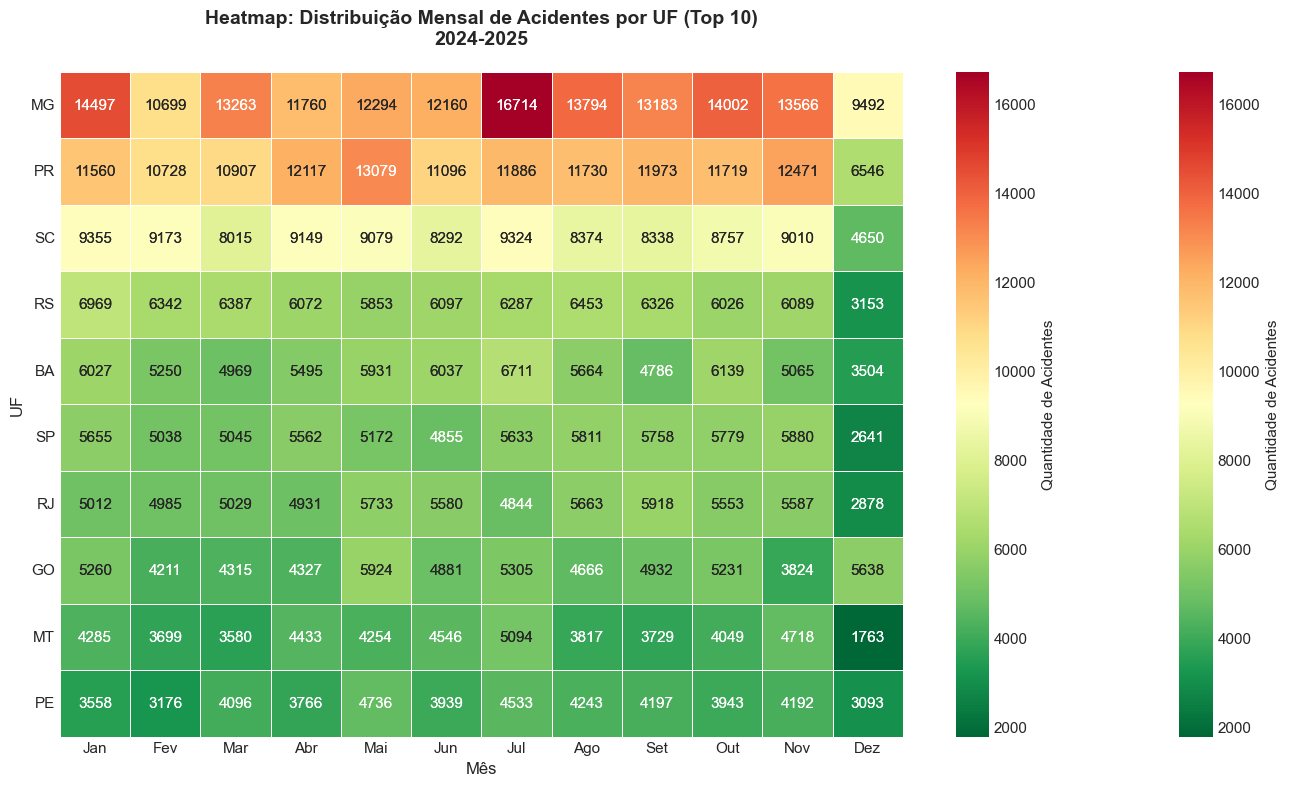

In [37]:
top_10_ufs = df['uf'].value_counts().head(10).index
df_top_ufs = df[df['uf'].isin(top_10_ufs)].copy()

heatmap_uf_mes = pd.crosstab(df_top_ufs['uf'], df_top_ufs['mes'])
heatmap_uf_mes['Total'] = heatmap_uf_mes.sum(axis=1)
heatmap_uf_mes = heatmap_uf_mes.sort_values('Total', ascending=False)
heatmap_uf_mes = heatmap_uf_mes.drop('Total', axis=1)

meses_nomes = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
heatmap_uf_mes.columns = [meses_nomes.get(col, col) for col in heatmap_uf_mes.columns]

display(heatmap_uf_mes)


plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_uf_mes,
    annot=True,
    fmt='d',
    cmap='RdYlGn_r',  # Vermelho (alto) -> Amarelo -> Verde (baixo)
    cbar_kws={'label': 'Quantidade de Acidentes'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('Heatmap: Distribuição Mensal de Acidentes por UF (Top 10)\n2024-2025', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12)
sns.heatmap(heatmap_uf_mes, annot=True, fmt='d', cmap='RdYlGn_r',
            cbar_kws={'label': 'Quantidade de Acidentes'},
            linewidths=0.5, linecolor='white')
plt.title('Heatmap: Distribuição Mensal de Acidentes por UF (Top 10)\n2024-2025', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ANÁLISE 10: Distribuição de Idade dos Envolvidos

**Nota:** Valores não informados (NA) são representados como -1 para visualização na camada RAW.

Total de registros: 1,131,595
Não informados (idade = -1): 205,819 (18.2%)
Outliers (idade > 200): 1,145

Estatísticas (excluindo -1 e outliers):
  Mínima: 0
  Máxima: 127
  Média: 38.9
  Mediana: 38


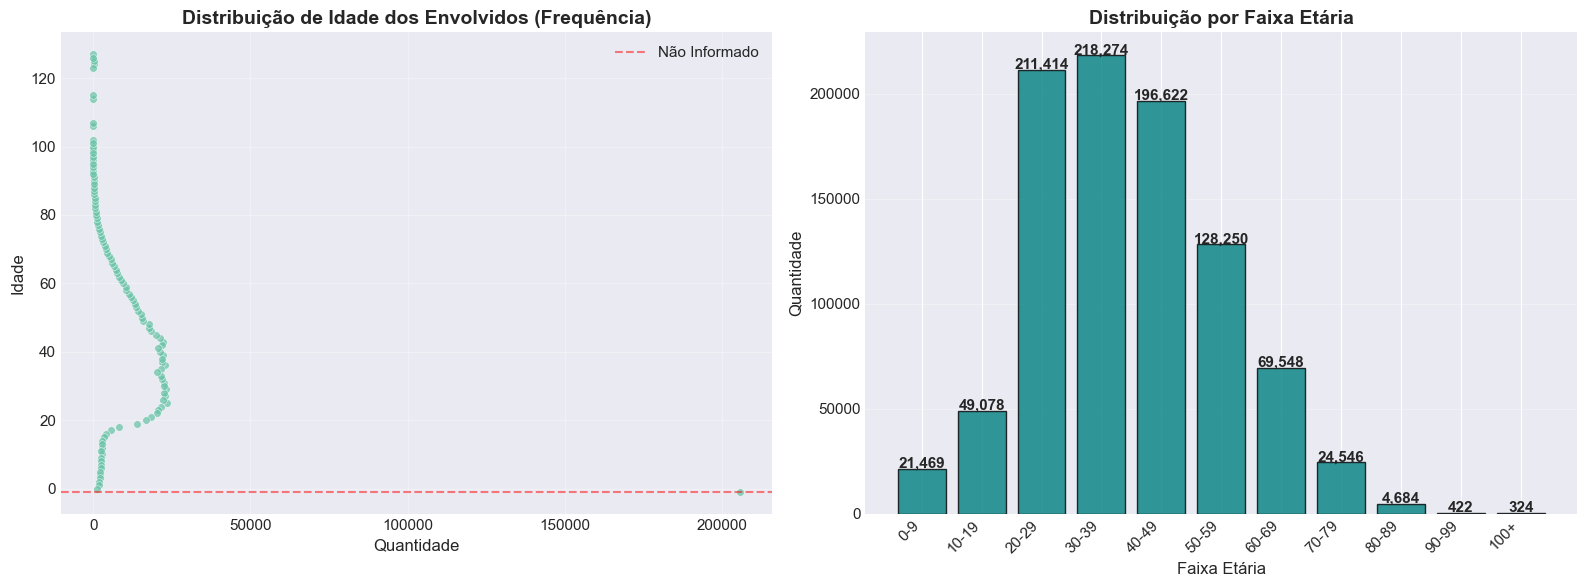

In [40]:
df_idade = df[['idade']].copy()
df_idade['idade'] = pd.to_numeric(df_idade['idade'], errors='coerce').fillna(-1).astype(int)

idade_stats = df_idade['idade'].describe()
qtd_nao_informado = (df_idade['idade'] == -1).sum()
qtd_outliers = ((df_idade['idade'] > 200) & (df_idade['idade'] != -1)).sum()

print(f"Total de registros: {len(df_idade):,}")
print(f"Não informados (idade = -1): {qtd_nao_informado:,} ({qtd_nao_informado/len(df_idade)*100:.1f}%)")
print(f"Outliers (idade > 200): {qtd_outliers:,}")
print(f"\nEstatísticas (excluindo -1 e outliers):")
df_idade_valido = df_idade[(df_idade['idade'] >= 0) & (df_idade['idade'] <= 200)]
print(f"  Mínima: {df_idade_valido['idade'].min()}")
print(f"  Máxima: {df_idade_valido['idade'].max()}")
print(f"  Média: {df_idade_valido['idade'].mean():.1f}")
print(f"  Mediana: {df_idade_valido['idade'].median():.0f}")

df_idade_tratado = df_idade[df_idade['idade'] <= 200]
contagem_idade = df_idade_tratado['idade'].value_counts()
df_plot_frequencia = contagem_idade.reset_index()
df_plot_frequencia.columns = ['idade', 'quantidade']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df_plot_frequencia, x='quantidade', y='idade', 
                s=30, alpha=0.7, ax=ax1)
ax1.set_title('Distribuição de Idade dos Envolvidos (Frequência)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quantidade', fontsize=12)
ax1.set_ylabel('Idade', fontsize=12)
ax1.ticklabel_format(style='plain', axis='x')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='Não Informado')
ax1.legend()

faixas_etarias = pd.cut(df_idade_valido['idade'], 
                        bins=[-0.1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 10000],
                        labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', 
                                '60-69', '70-79', '80-89', '90-99', '100+'])
contagem_faixas = faixas_etarias.value_counts().sort_index()

ax2.bar(range(len(contagem_faixas)), contagem_faixas.values, 
        color='teal', edgecolor='black', alpha=0.8)
ax2.set_xticks(range(len(contagem_faixas)))
ax2.set_xticklabels(contagem_faixas.index, rotation=45, ha='right')
ax2.set_title('Distribuição por Faixa Etária', fontsize=14, fontweight='bold')
ax2.set_xlabel('Faixa Etária', fontsize=12)
ax2.set_ylabel('Quantidade', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

for i, valor in enumerate(contagem_faixas.values):
    ax2.text(i, valor + 500, f'{valor:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [38]:
print('\n' + '='*80)
print('RESUMO EXECUTIVO - ACIDENTES PRF 2024-2025')
print('='*80)

print(f"\nVOLUME DE DADOS:")
print(f"Registros: {len(df):,} | Acidentes únicos: {df['id'].nunique():,}")

print(f"\nGRAVIDADE:")
print(f"Mortes: {df['mortos'].sum():,} | Feridos Graves: {df['feridos_graves'].sum():,} | Feridos Leves: {df['feridos_leves'].sum():,}")
print(f"Taxa de fatalidade: {(df[df['mortos'] > 0].shape[0]/len(df)*100):.2f}%")

print(f"\nDESTAQUES:")
print(f"UF com mais acidentes: {acidentes_uf.index[0]} ({acidentes_uf.iloc[0]:,})")
print(f"Causa principal: {causas.index[0]}")
print(f"Tipo principal: {tipos.index[0]}")
print(f"Veículo mais envolvido: {veiculos.index[0]}")

print('='*80)


RESUMO EXECUTIVO - ACIDENTES PRF 2024-2025

VOLUME DE DADOS:
Registros: 1,131,595 | Acidentes únicos: 138,840

GRAVIDADE:
Mortes: 55,056 | Feridos Graves: 130,533 | Feridos Leves: 349,029
Taxa de fatalidade: 4.87%

DESTAQUES:
UF com mais acidentes: MG (17,976)
Causa principal: Reação tardia ou ineficiente do condutor
Tipo principal: Colisão traseira
Veículo mais envolvido: Automóvel
